In [ ]:
cd # Please enter the absolute path

In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

import torch

In [ ]:
from utils.dataloader import make_datapath_list, DataTransform, BrainDataset
rootpath = os.path.abspath("")
makepath = make_datapath_list(rootpath)
test_img_list, test_anno_list = makepath.get_list("test")

In [ ]:
from utils.pspnet import PSPNet

net = PSPNet(n_classes = 2)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
state_dict = torch.load('weights/pspnet50_15.pth', map_location={"cuda:0": "cpu"})
net.load_state_dict(state_dict)
net.to(device)

PSPNet(
  (feature_conv): FeatureMap_convolution(
    (cbnr_1): conv2DBatchNormRelu(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (cbnr_2): conv2DBatchNormRelu(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (cbnr_3): conv2DBatchNormRelu(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (feature_res_1): ResidualBlockPSP(
    (block1): bottleNec

In [ ]:
from utils.pspnet475_show import  PSPNet_show_image

In [ ]:
pspnet_show = PSPNet_show_image(test_img_list, test_anno_list, net, 475, device)
result_img = pspnet_show.show_and_save_image(20)

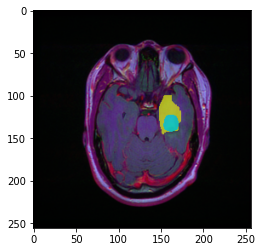

In [ ]:
plt.imshow(result_img)
plt.show()

# 推論結果を可視化した画像を保存

In [ ]:
import re
for idx, img_path in enumerate(test_img_list):
  save_name = "result_image/"+re.split("[/.]", test_img_list[idx])[-2]+"_result.png"
  result_img = pspnet_show.show_and_save_image(idx)
  cv2.imwrite(save_name, result_img)